In [4]:
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling

import numpy as np
import matplotlib.pyplot as plt

# 📂 Directorios
imagenes_dir = r"E:\Memoria\CNN\Originales\TIFF\RM"
morfometria_dir = r"E:\Memoria\CNN\PreProcesamiento\rasters_recortados2"
output_dir = r"E:\Memoria\CNN\PreProcesamiento\fusionadas_numpy2"


# Cargar un ejemplo (e.g., car2_fusionada.npy)
sample_path = r"E:\Memoria\CNN\PreProcesamiento\fusionadas_numpy2\car2_fusionada.npy"
imagen_fusionada = np.load(sample_path)

print("🔍 Shape del array fusionado:", imagen_fusionada.shape)
print("🔍 Número total de canales:", imagen_fusionada.shape[2])


🔍 Shape del array fusionado: (1204, 1715, 11)
🔍 Número total de canales: 11


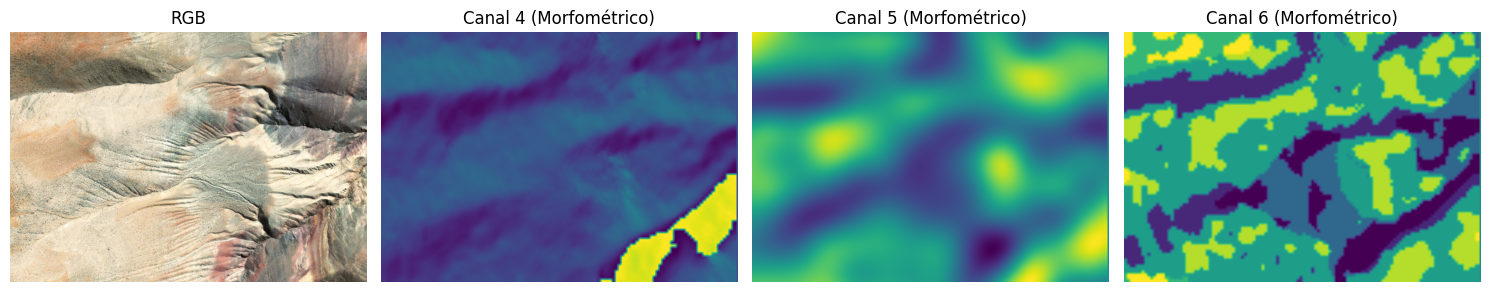

In [6]:
import random
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling

import numpy as np
import matplotlib.pyplot as plt

# 📂 Directorios
imagenes_dir = r"E:\Memoria\CNN\Originales\TIFF\RM"
morfometria_dir = r"E:\Memoria\CNN\PreProcesamiento\rasters_recortados2"
output_dir = r"E:\Memoria\CNN\PreProcesamiento\fusionadas_numpy2"


# Cargar un ejemplo (e.g., car2_fusionada.npy)
sample_path = r"E:\Memoria\CNN\PreProcesamiento\fusionadas_numpy2\car2_fusionada.npy"
imagen_fusionada = np.load(sample_path)


def plot_sample_channels(sample_array, n_morfometricos=3):
    # Extraer canales RGB (primeros 3 canales)
    rgb = sample_array[..., :3].astype(np.uint8)  # Asumiendo que RGB está en 0-255

    # Extraer primeros 'n_morfometricos' canales morfométricos
    morfometricos = sample_array[..., 3:3 + n_morfometricos]

    # Crear figura
    fig, axes = plt.subplots(1, n_morfometricos + 1, figsize=(15, 5))
    
    # Plot RGB
    axes[0].imshow(rgb)
    axes[0].set_title("RGB")
    axes[0].axis('off')
    
    # Plot canales morfométricos
    for i in range(n_morfometricos):
        channel = morfometricos[..., i]
        axes[i+1].imshow(channel, cmap='viridis')  # Usar colormap adecuado
        axes[i+1].set_title(f"Canal {i+4} (Morfométrico)")
        axes[i+1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Ejecutar para una muestra
plot_sample_channels(imagen_fusionada, n_morfometricos=3)

In [7]:
# Leer nombres de canales de una muestra
with open(os.path.join(output_dir, "nombres_canales.txt"), "r") as f:
    lineas = f.readlines()

# Ejemplo: Buscar "car2" en el archivo
for linea in lineas:
    if "car2" in linea:
        print("📋 Canales para car2:", linea)

📋 Canales para car2: car2: Red, Green, Blue, Aspect_car2.tif, Convexity_car2.tif, Landforms_car2.tif, Radar2020_car2.tif, Slope_grados_car2.tif, Terrain Ruggedness Index (TRI)_car2.tif, Topographic Position Index_car2.tif, Vector Terrain Ruggedness (VRM)_car2.tif

📋 Canales para car2: car20: Red, Green, Blue, Aspect_car20.tif, Convexity_car20.tif, Landforms_car20.tif, Radar2020_car20.tif, Slope_grados_car20.tif, Terrain Ruggedness Index (TRI)_car20.tif, Topographic Position Index_car20.tif, Vector Terrain Ruggedness (VRM)_car20.tif

📋 Canales para car2: car21: Red, Green, Blue, Aspect_car21.tif, Convexity_car21.tif, Landforms_car21.tif, Radar2020_car21.tif, Slope_grados_car21.tif, Terrain Ruggedness Index (TRI)_car21.tif, Topographic Position Index_car21.tif, Vector Terrain Ruggedness (VRM)_car21.tif

📋 Canales para car2: car22: Red, Green, Blue, Aspect_car22.tif, Convexity_car22.tif, Landforms_car22.tif, Radar2020_car22.tif, Slope_grados_car22.tif, Terrain Ruggedness Index (TRI)_car22

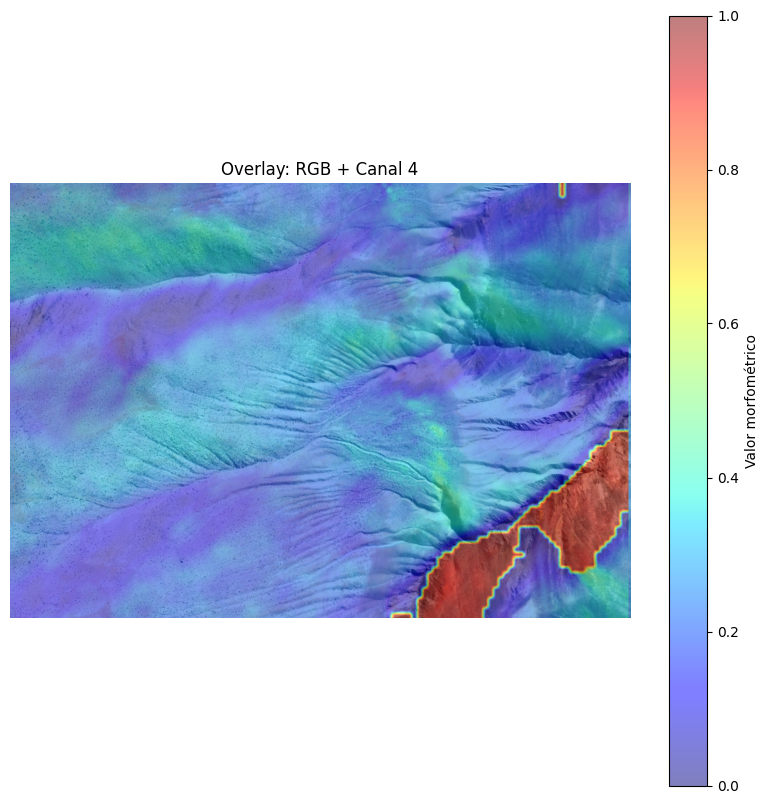

In [8]:


def plot_overlay(sample_array, morf_channel_idx=3, alpha=0.5):
    rgb = sample_array[..., :3].astype(np.uint8)
    morf_channel = sample_array[..., morf_channel_idx]
    
    # Normalizar canal morfométrico para visualización
    morf_normalized = (morf_channel - np.min(morf_channel)) / (np.max(morf_channel) - np.min(morf_channel))
    
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb)
    plt.imshow(morf_normalized, cmap='jet', alpha=alpha)  # Ajustar transparencia
    plt.colorbar(label='Valor morfométrico')
    plt.title(f"Overlay: RGB + Canal {morf_channel_idx + 1}")
    plt.axis('off')
    plt.show()

# Ejemplo: Overlay del primer canal morfométrico (índice 3)
plot_overlay(imagen_fusionada, morf_channel_idx=3)


🔎 Analizando car24_fusionada.npy:
Shape: (2408, 3430, 11)


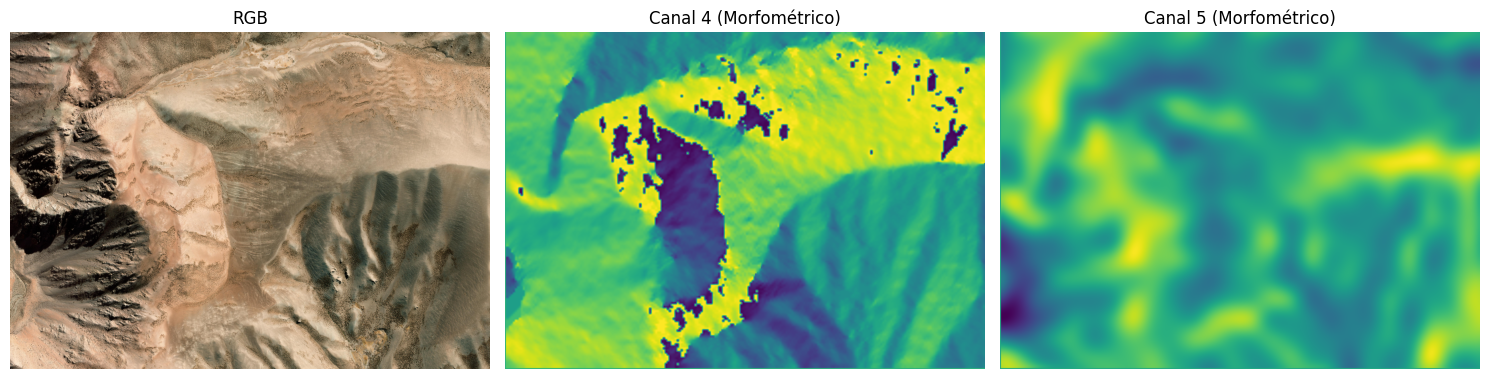

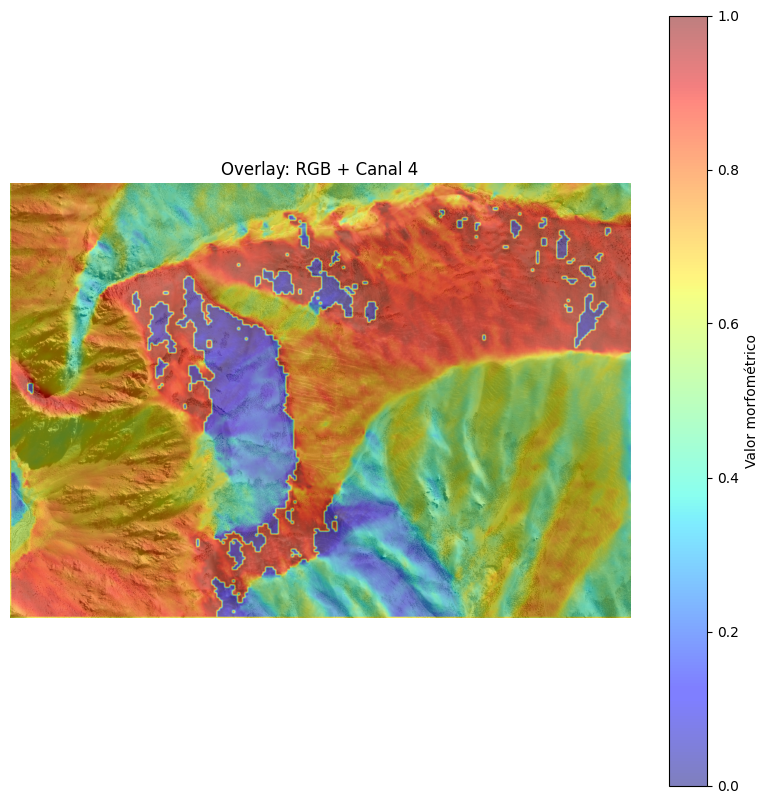


🔎 Analizando car12_fusionada.npy:
Shape: (1204, 1715, 11)


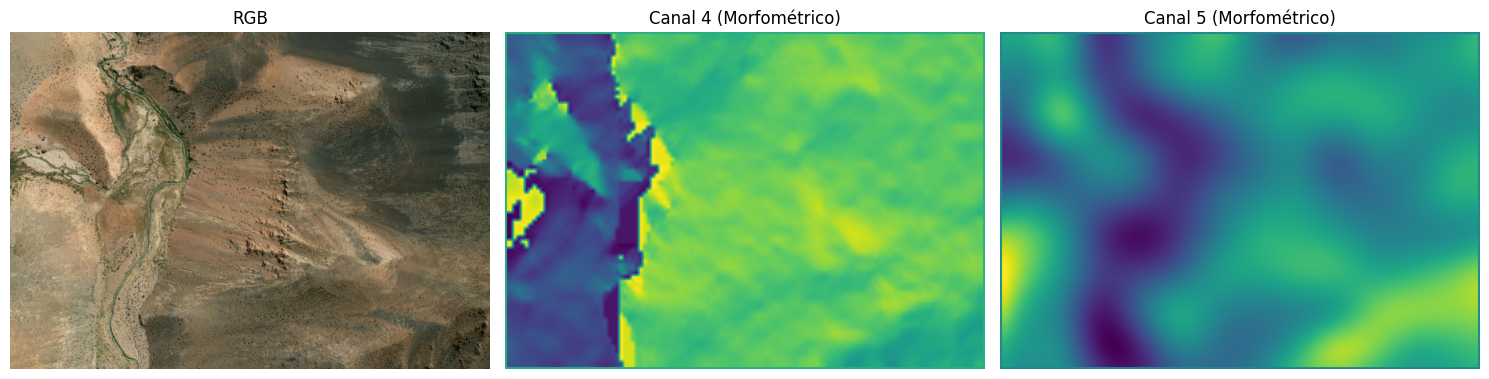

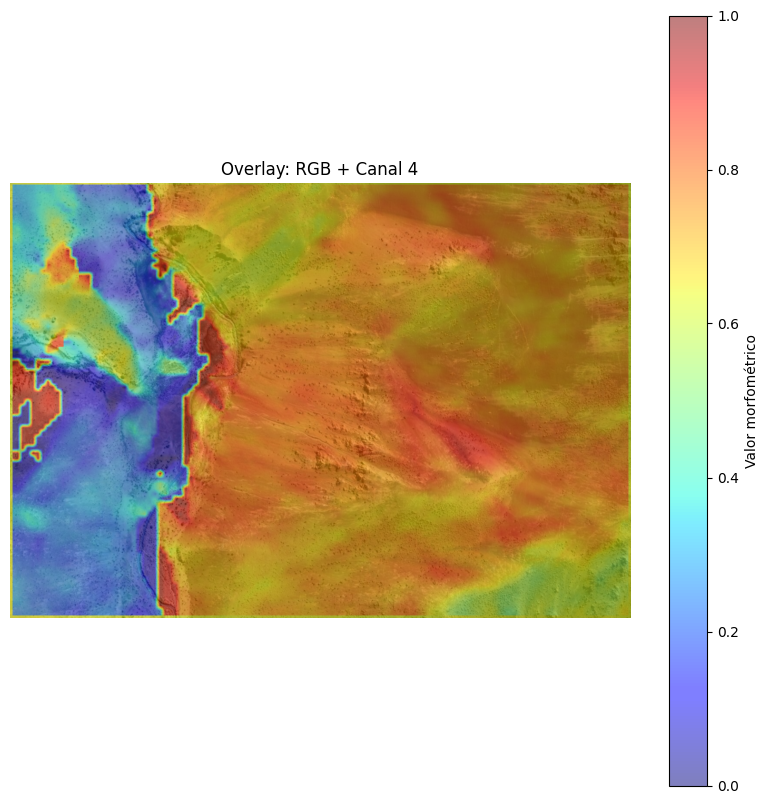


🔎 Analizando rm18_fusionada.npy:
Shape: (4835, 6879, 11)


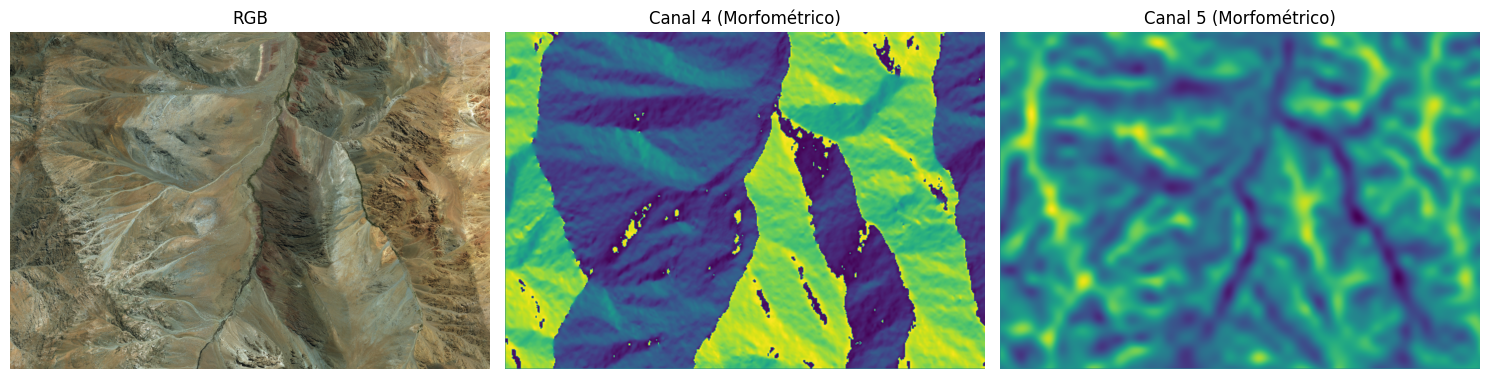

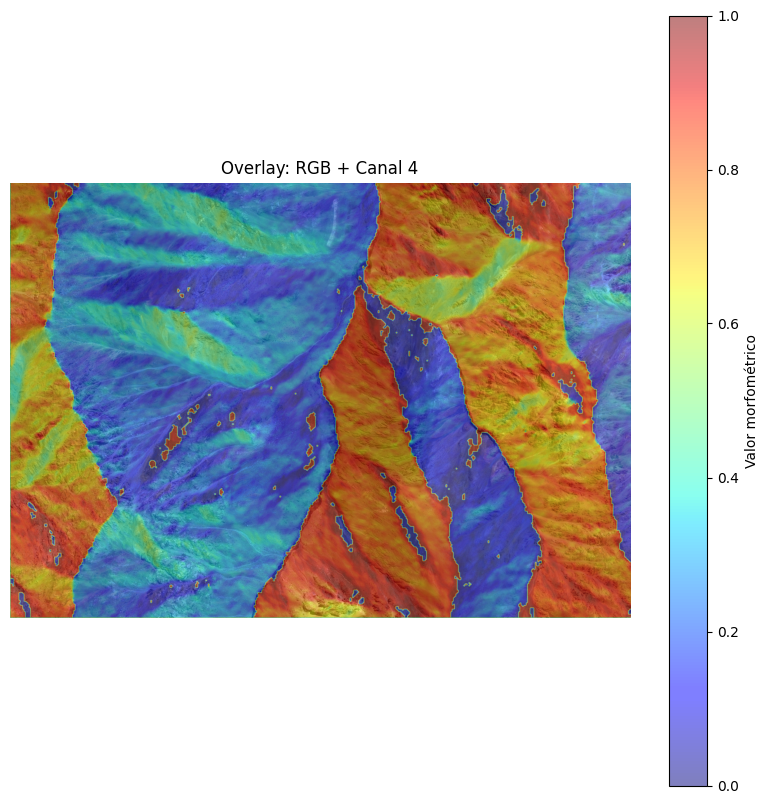


🔎 Analizando car10_fusionada.npy:
Shape: (1204, 1715, 11)


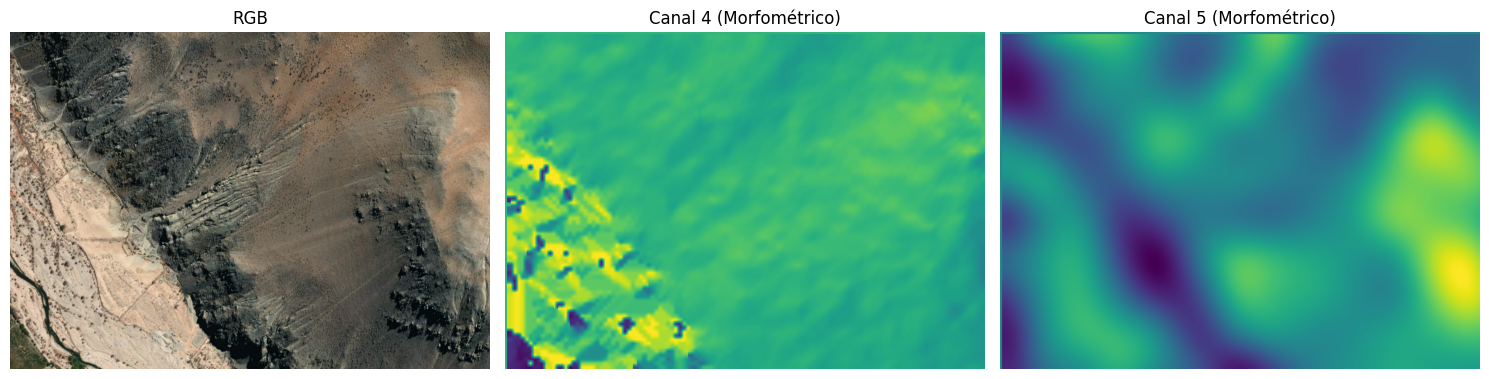

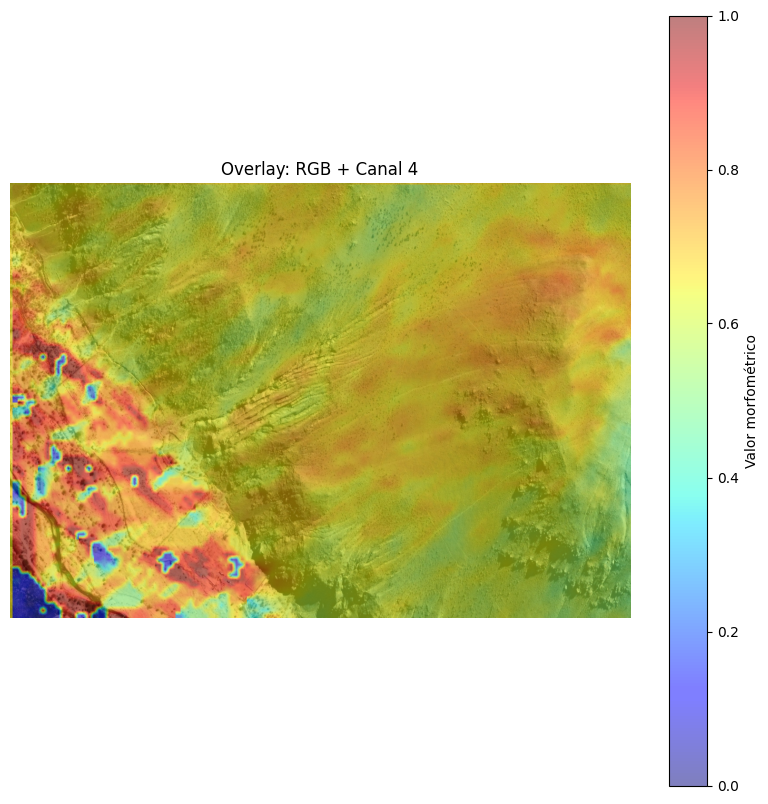

In [11]:

# Listar todos los archivos fusionados
fusionadas = [f for f in os.listdir(output_dir) if f.endswith(".npy")]

# Seleccionar 4 aleatorias
random_samples = random.sample(fusionadas, 4)

# Procesar cada una
for sample in random_samples:
    sample_path = os.path.join(output_dir, sample)
    imagen = np.load(sample_path)
    print(f"\n🔎 Analizando {sample}:")
    print("Shape:", imagen.shape)
    plot_sample_channels(imagen, n_morfometricos=2)
    plot_overlay(imagen, morf_channel_idx=3)